In [28]:
import numpy as np 
import pandas as pd 
#import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, mean_squared_error
#from tensorflow.keras.models import Sequential

In [29]:
df = pd.read_csv('data-breast cancer.csv')

df.head()

#df.dropna()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [30]:
#dropping columns with very low correlation and null values
df.drop(df.columns[[0,4,7,8,9,10,11,13,32]], axis =1, inplace = True)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'area_mean',
       'smoothness_mean', 'radius_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [31]:
enc = OrdinalEncoder()


df[['diagnosis']] = enc.fit_transform(df[['diagnosis']])

In [32]:
selected_features = df[['radius_mean', 'area_mean', 'radius_worst', 'perimeter_worst', 'area_worst', 'concavity_worst', 'concave points_worst' ]]
display(selected_features)

,radius_mean,area_mean,radius_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst
0,17.99,1001.0,25.380,184.60,2019.0,0.7119,0.2654
1,20.57,1326.0,24.990,158.80,1956.0,0.2416,0.1860
2,19.69,1203.0,23.570,152.50,1709.0,0.4504,0.2430
3,11.42,386.1,14.910,98.87,567.7,0.6869,0.2575
4,20.29,1297.0,22.540,152.20,1575.0,0.4000,0.1625
...,...,...,...,...,...,...,...
564,21.56,1479.0,25.450,166.10,2027.0,0.4107,0.2216
565,20.13,1261.0,23.690,155.00,1731.0,0.3215,0.1628
566,16.60,858.1,18.980,126.70,1124.0,0.3403,0.1418
567,20.60,1265.0,25.740,184.60,1821.0,0.9387,0.2650


In [33]:
#selecting and scaling X variable (selected features)
scaler = StandardScaler()

X = scaler.fit_transform(selected_features)

In [34]:
#from sklearn.datasets import fetch_openml
 #   dataset = fetch_openml(name='credit-g', version='1')

y = df['diagnosis']    


In [35]:

encoder = LabelEncoder()
Y = encoder.fit_transform(y)
    
    

In [36]:
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
#creating a split (train/test)
X_train, X_test_val, Y_train, Y_test_val = train_test_split(X, Y, test_size=0.2, random_state=45)


#creating a split (train/val)

X_test, X_val, Y_test, Y_val = train_test_split(X_test_val, Y_test_val, test_size=0.5, random_state=45)

# now the train/validate/test split will be 80%/10%/10%
    

In [37]:
scaler = StandardScaler()
X_trainscale = scaler.fit_transform(X_train)
X_testscale = scaler.transform(X_test)
    

In [38]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(46), 
                      max_iter=200, 
                      random_state=42,
                      verbose = True)


In [39]:
model.fit(X_trainscale, Y_train,)

Iteration 1, loss = 0.70999033
Iteration 2, loss = 0.65738772
Iteration 3, loss = 0.60935397
Iteration 4, loss = 0.56544723
Iteration 5, loss = 0.52702560
Iteration 6, loss = 0.49185851
Iteration 7, loss = 0.46079433
Iteration 8, loss = 0.43313616
Iteration 9, loss = 0.40899677
Iteration 10, loss = 0.38691561
Iteration 11, loss = 0.36744106
Iteration 12, loss = 0.35021618
Iteration 13, loss = 0.33455539
Iteration 14, loss = 0.32041393
Iteration 15, loss = 0.30783105
Iteration 16, loss = 0.29625580
Iteration 17, loss = 0.28582707
Iteration 18, loss = 0.27606914
Iteration 19, loss = 0.26733964
Iteration 20, loss = 0.25915407
Iteration 21, loss = 0.25180693
Iteration 22, loss = 0.24488045
Iteration 23, loss = 0.23857036
Iteration 24, loss = 0.23272686
Iteration 25, loss = 0.22732136
Iteration 26, loss = 0.22220762
Iteration 27, loss = 0.21746202
Iteration 28, loss = 0.21308969
Iteration 29, loss = 0.20888230
Iteration 30, loss = 0.20510101
Iteration 31, loss = 0.20142061
Iteration 32, los

C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=46, random_state=42, verbose=True)

In [40]:
model_pred = model.predict(X_test)
model_pred

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1], dtype=int64)

In [41]:
modelaccuracy = accuracy_score(Y_test, model_pred)
print("Accuracy score:", modelaccuracy)

Accuracy score: 0.9298245614035088


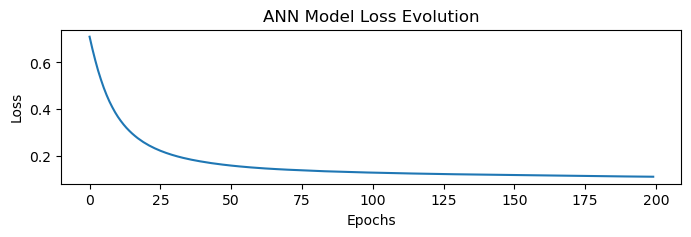

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 2))
plt.title("ANN Model Loss Evolution")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(model.loss_curve_)
plt.show()

In [43]:
# Returns the mean accuracy on the given test data and labels
print("The model has a test data accuracy of:",model.score(X_test,Y_test))
print("The model has a training data accuracy of:",model.score(X_train,Y_train))

The model has a test data accuracy of: 0.9298245614035088
The model has a training data accuracy of: 0.9472527472527472


In [44]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

In [45]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix = confusion_matrix(Y_test, y_pred)

In [46]:
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        37
           1       0.90      0.90      0.90        20

    accuracy                           0.93        57
   macro avg       0.92      0.92      0.92        57
weighted avg       0.93      0.93      0.93        57



In [47]:
# Read the data file
data = pd.read_csv('insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
#data.drop(data.columns[0], axis = 1)

In [49]:
#encoding and selecting features
enc = OrdinalEncoder()


data[['sex', 'smoker', 'region']] = enc.fit_transform(data[['sex', 'smoker', 'region']])


selected_features1 = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
display(selected_features1)

,age,sex,bmi,children,smoker,region
0,19,0.0,27.900,0,1.0,3.0
1,18,1.0,33.770,1,0.0,2.0
2,28,1.0,33.000,3,0.0,2.0
3,33,1.0,22.705,0,0.0,1.0
4,32,1.0,28.880,0,0.0,1.0
...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1.0
1334,18,0.0,31.920,0,0.0,0.0
1335,18,0.0,36.850,0,0.0,2.0
1336,21,0.0,25.800,0,0.0,3.0


In [50]:
#selecting and scaling X variable (selected features)
scaler1 = StandardScaler()

X1 = scaler1.fit_transform(selected_features1)

In [51]:
# defining y variable

Y1 = data['charges'].values

In [52]:
# Split the data into training and testing sets
#X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

#creating a split (train/test)
X1_train, X1_test_val, Y1_train, Y1_test_val = train_test_split(X1, Y1, test_size=0.2, random_state=45)


#creating a split (train/val)

X1_test, X1_val, Y1_test, Y1_val = train_test_split(X1_test_val, Y1_test_val, test_size=0.5, random_state=45)

# now the train/validate/test split will be 80%/10%/10%
    
# Standardize the features
#scaler = StandardScaler()
#X1_train_scaled = scaler.fit_transform(X1_train)
#X1_test_scaled = scaler.transform(X1_test)

In [53]:
#Design Network
regressor1 = MLPRegressor(hidden_layer_sizes=(50,), 
                             max_iter=1000, 
                             random_state=42)

#Train the regressor
regressor1.fit(X1_train, Y1_train)

#Predict the petal width (cm) 
regressor1pred = regressor1.predict(X1_test)

#Evaluate the model
regressor1mse = mean_squared_error(Y1_test, regressor1pred)
#scoreRFR = RFR.score(X_test, y_test)
#y_pred2 = RFR.predict(X_test)
scoreregressor1 = regressor1.score(X1_test, Y1_test)
print("Model MSE is:", round(regressor1mse,3))



Model MSE is: 233827957.985


C:\Users\ideod\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


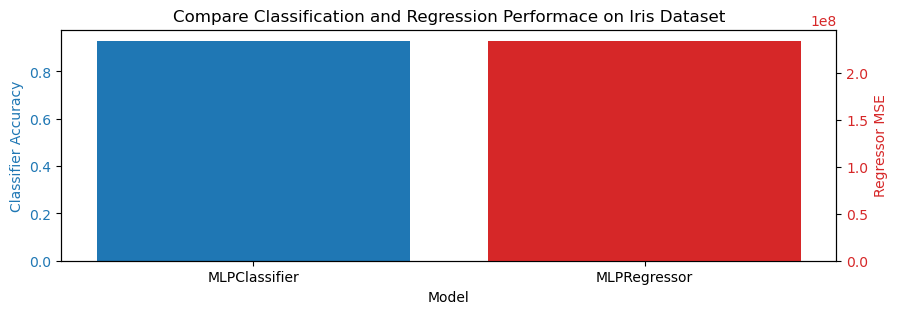

In [54]:
fig, ax1 = plt.subplots(figsize=(10, 3))

#model_names = ['MLPClassifier', 'TF MLP Classifier','MLPRegressor','TF MLP Regressor']
#accuracies = [modelaccuracy, model1_accuracy,0,0]
#mse = [0,0,regressor1mse, regressor2mse]

model_names = ['MLPClassifier', 'MLPRegressor']
accuracies = [modelaccuracy,0]
mse = [0,regressor1mse]

ax1.set_xlabel('Model')
ax1.set_ylabel('Classifier Accuracy', color='tab:blue')
ax1.bar(model_names, accuracies, color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create the second plot with the right y-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Regressor MSE', color='tab:red')
ax2.bar(model_names, mse, color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Compare Classification and Regression Performace on Iris Dataset')
plt.show()